In [148]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'Class'])

In [149]:
#divido il dataset
X = df.drop('Class', 1)
y = df['Class']

In [174]:
#divido il dataset in train e test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [175]:
#normalizzo i dati per poter applicare PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [176]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [177]:
#calcolo la varianza di ogni componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.71803699, 0.24442718, 0.03337158, 0.00416425])

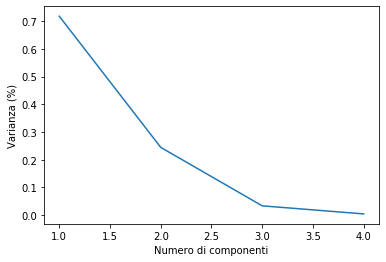

In [178]:
#noto per la prima componente e' respondabile del 72.2% della varianza
#sommata con la seconda otteniamo il 96.2% della varianza totale
plt.figure()
x = np.arange(1, 5)
plt.plot(x, explained_variance)
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza (%)')
plt.show()

In [179]:
#il grafico visualizza bene il fatto che la varianza sia data maggiormente dalla prima componente
#ovviamente non esistono componenti con la virgola, si guardi solo i numeri interi

In [180]:
#Provo a trainare usando solo la prima componente
from sklearn.decomposition import PCA

def setPCA(quantiComponenti):
    pca = PCA(n_components=quantiComponenti)

setPCA(1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [181]:
#uso SVC come modello 
from sklearn.svm import SVC

model = SVC(gamma='scale')
model.fit(X_train, y_train)

#predizione
y_pred = model.predict(X_test)

In [182]:
#valutazione 
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy", accuracy_score(y_test, y_pred))

[[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]
Accuracy 0.9111111111111111


In [183]:
#Rieseguo usando 2 componenti
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy", accuracy_score(y_test, y_pred))

[[16  0  0]
 [ 0 10  8]
 [ 0  0 11]]
Accuracy 0.8222222222222222


In [184]:
#Ora rieseguo il calcolo senza usare pca

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [185]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy", accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy 1.0
